# 202021340 정찬우 중간평가

 
- toc::true
- branch: master
- badges: true
-comments: true
-author: 정찬우
-categories: [python]


## 1. dataset: 'bank_marketing_dataset'  data
본 데이터는 포르투갈 은행 기관의 직접 마케팅 캠페인(전화 통화)에 대한 정보를 담고 있다.  41189개의 관측치와 21개의 변수가 존재한다. 주요 변수들에 대한 설명은 다음과 같다.

- `age` : 나이
- `job` : 직업
- `marital` : 결혼 상태
- `education` : 교육 상태 - 기본 4년(basic.4y), 기본 6년(basic.6y), 기본 9년(basic.9y), 고등학교(high.school), 학위     (illiterate), 전문직 과정(professioal.course), 대학 과정(university.degree), 알수 없음(unknown)
- `default` : 신용 불이행 
- `housing` : 주택 대출
- `loan` : 개인 대출
- `subscribed` : 구독 여부


## 2. 데이터 탐색

##### 1) 직업 및  변수 탐색

- 시각화 
     -먼저 직업의 구성(비)를 확인하기 위하여 막대그래프 및 원형그래프를 그려 보았다.
    -pdays', 'poutcome', 'putcome'은 신규고객이 대부분을 차지하므로 삭제하였다.
   

In [1]:
import pandas as pd # pandas 패키지 로딩 pd란 명칭으로 로드
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
import pandas as pd  
from scipy import stats

In [2]:
bank = pd.read_csv('bank_marketing_dataset.csv') #csv파일을 bank라는 이름으로 저장
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.shape

(41188, 21)

In [4]:
bank.dropna(axis=0, how='any', inplace=True)

In [5]:
bank.drop(['pdays', 'poutcome', 'previous'],axis=1, inplace=True)  ### 'pdays', 'poutcome', 'putcome'이 삭제

In [6]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
bank.shape   ### 'pdays', 'poutcome', 'putcome'이 삭제된것을 알 수 있다.

(41188, 18)

info 함수를 이용하여 bank 자료의 구조를 확인.

In [8]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  subscribed      41188 non-null 

## 각 변수들에 대하여 데이터 타입에 따른 요약 통계량을 구하자.

In [9]:
bank.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## 나이별로 데이터를 정렬

In [10]:
bank=bank.sort_values(by='age',ascending=True).reset_index().rename(columns={'index':'index_old'})
#이전 데이터의 index는 index_old로 표현하고 나이별로 index를 다시 설정

In [11]:
bank

,index_old,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,-3.4,92.431,-26.9,0.742,5017.5,yes
1,37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,-2.9,92.201,-31.4,0.869,5076.2,yes
2,37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,-2.9,92.201,-31.4,0.869,5076.2,no
3,37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,-2.9,92.201,-31.4,0.884,5076.2,no
4,37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,40450,92,retired,married,unknown,no,no,yes,cellular,aug,tue,1064,1,-1.7,94.027,-38.3,0.904,4991.6,yes
41184,38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,134,1,-3.4,92.649,-30.1,0.716,5017.5,no
41185,27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,85,1,-1.8,92.843,-50.0,1.650,5099.1,no
41186,38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,272,2,-3.4,92.431,-26.9,0.730,5017.5,yes


## 3. 데이터 시각화

## 변수별 데이터의 크기를 바로 보기 위해 원형그래프를 그려 보자.

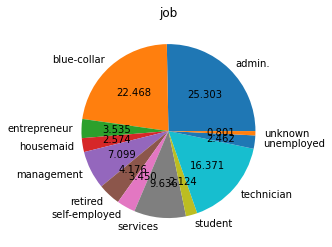

In [12]:
count_by_cut = bank.groupby('job').size() 
plt.pie(x = count_by_cut, labels = count_by_cut.index,autopct = '%.3f')
plt.title("job")
plt.show()

직업별로 데이터를 원형그래프로 그렸고 admin직업과 blue-collar가 가장 많은 비율을 차지한다.

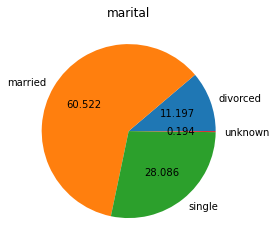

In [13]:
count_by_cut = bank.groupby('marital').size()
plt.pie(x = count_by_cut, labels = count_by_cut.index,autopct = '%.3f')
plt.title("marital")
plt.show()

결혼 상태별로 데이터를 원형그래프로 그렸고 결혼한 사람이 많은 비율을 차지한다는 것을 알 수 있다.

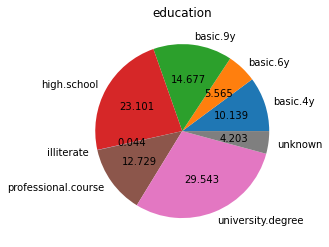

In [14]:
count_by_cut = bank.groupby('education').size() 
plt.pie(x = count_by_cut, labels = count_by_cut.index,autopct = '%.3f')
plt.title("education")
plt.show()

교육 상태 별로 데이터를 원형그래프로 그렸고 university.degree가 많은 비율을 차지한다는 것을 알 수 있다.

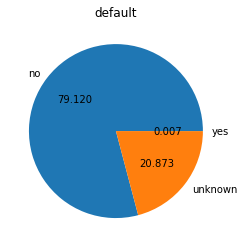

In [15]:
count_by_cut = bank.groupby('default').size() 
plt.pie(x = count_by_cut, labels = count_by_cut.index,autopct = '%.3f')
plt.title("default")
plt.show()

신용 불이행 상태 별로 데이터를 원형그래프로 그렸고 대부분은 신용 불이행 상태가 아님을 알 수 있다.

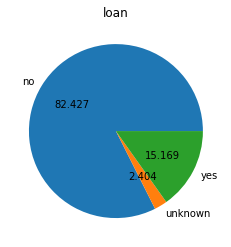

In [16]:
count_by_cut = bank.groupby('loan').size() 
plt.pie(x = count_by_cut, labels = count_by_cut.index,autopct = '%.3f')
plt.title("loan")
plt.show()

개인 대출 상태 별로 데이터를 원형그래프로 그렸고 약 82%가 개인 대출이 없음을 알 수 있다.

## 변수별 데이터의 크기를 바로 보기 위해 막대그래프를 그려 보자.

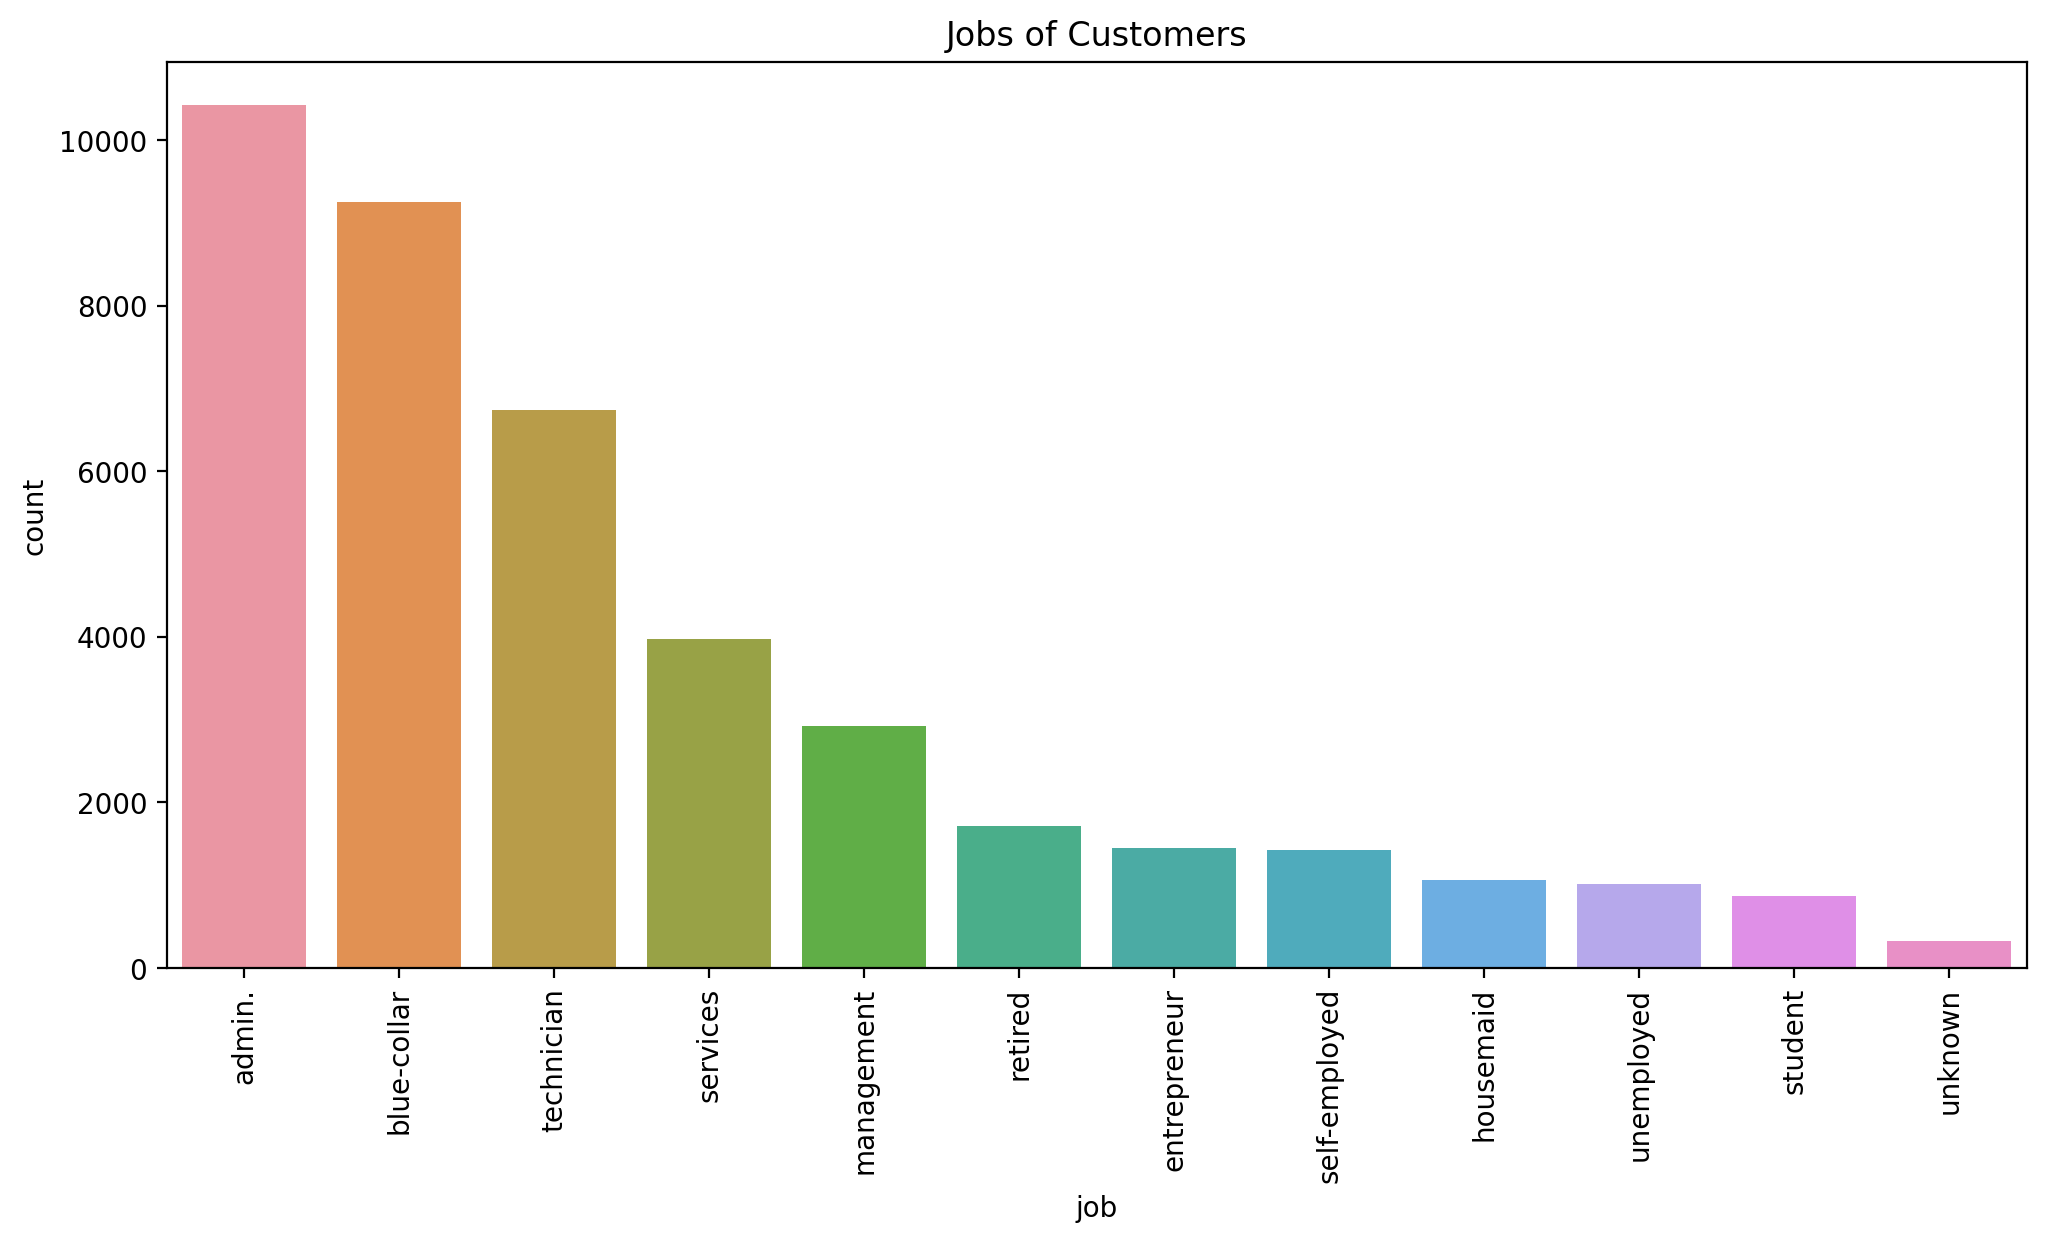

In [17]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=bank,x="job",order=bank.job.value_counts().index)
plt.title("Jobs of Customers") # 고객별 직업
plt.xticks(rotation=90)
plt.show()

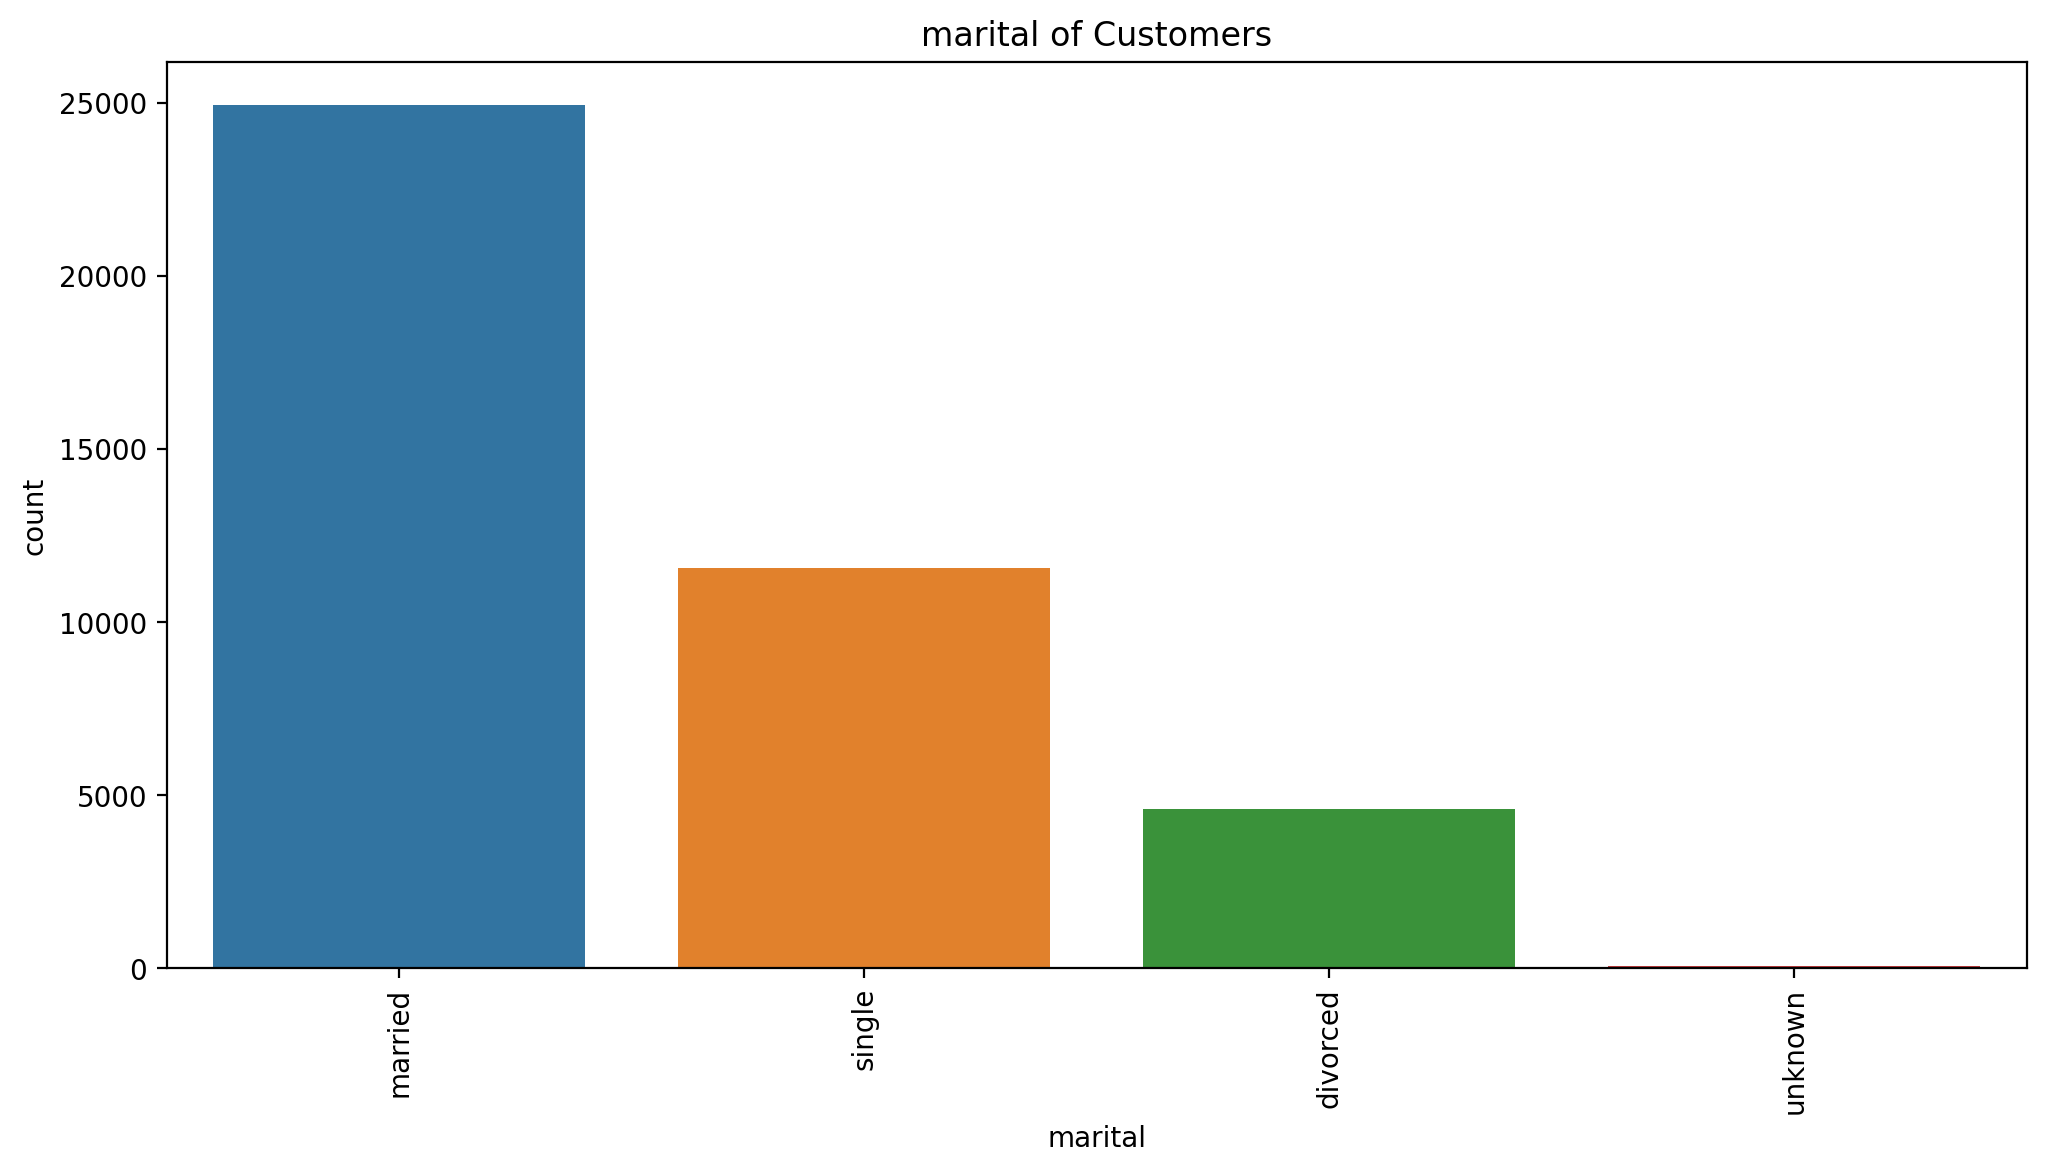

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=bank,x="marital",order=bank.marital.value_counts().index)
plt.title("marital of Customers") #고객별 결혼상태
plt.xticks(rotation=90)
plt.show()

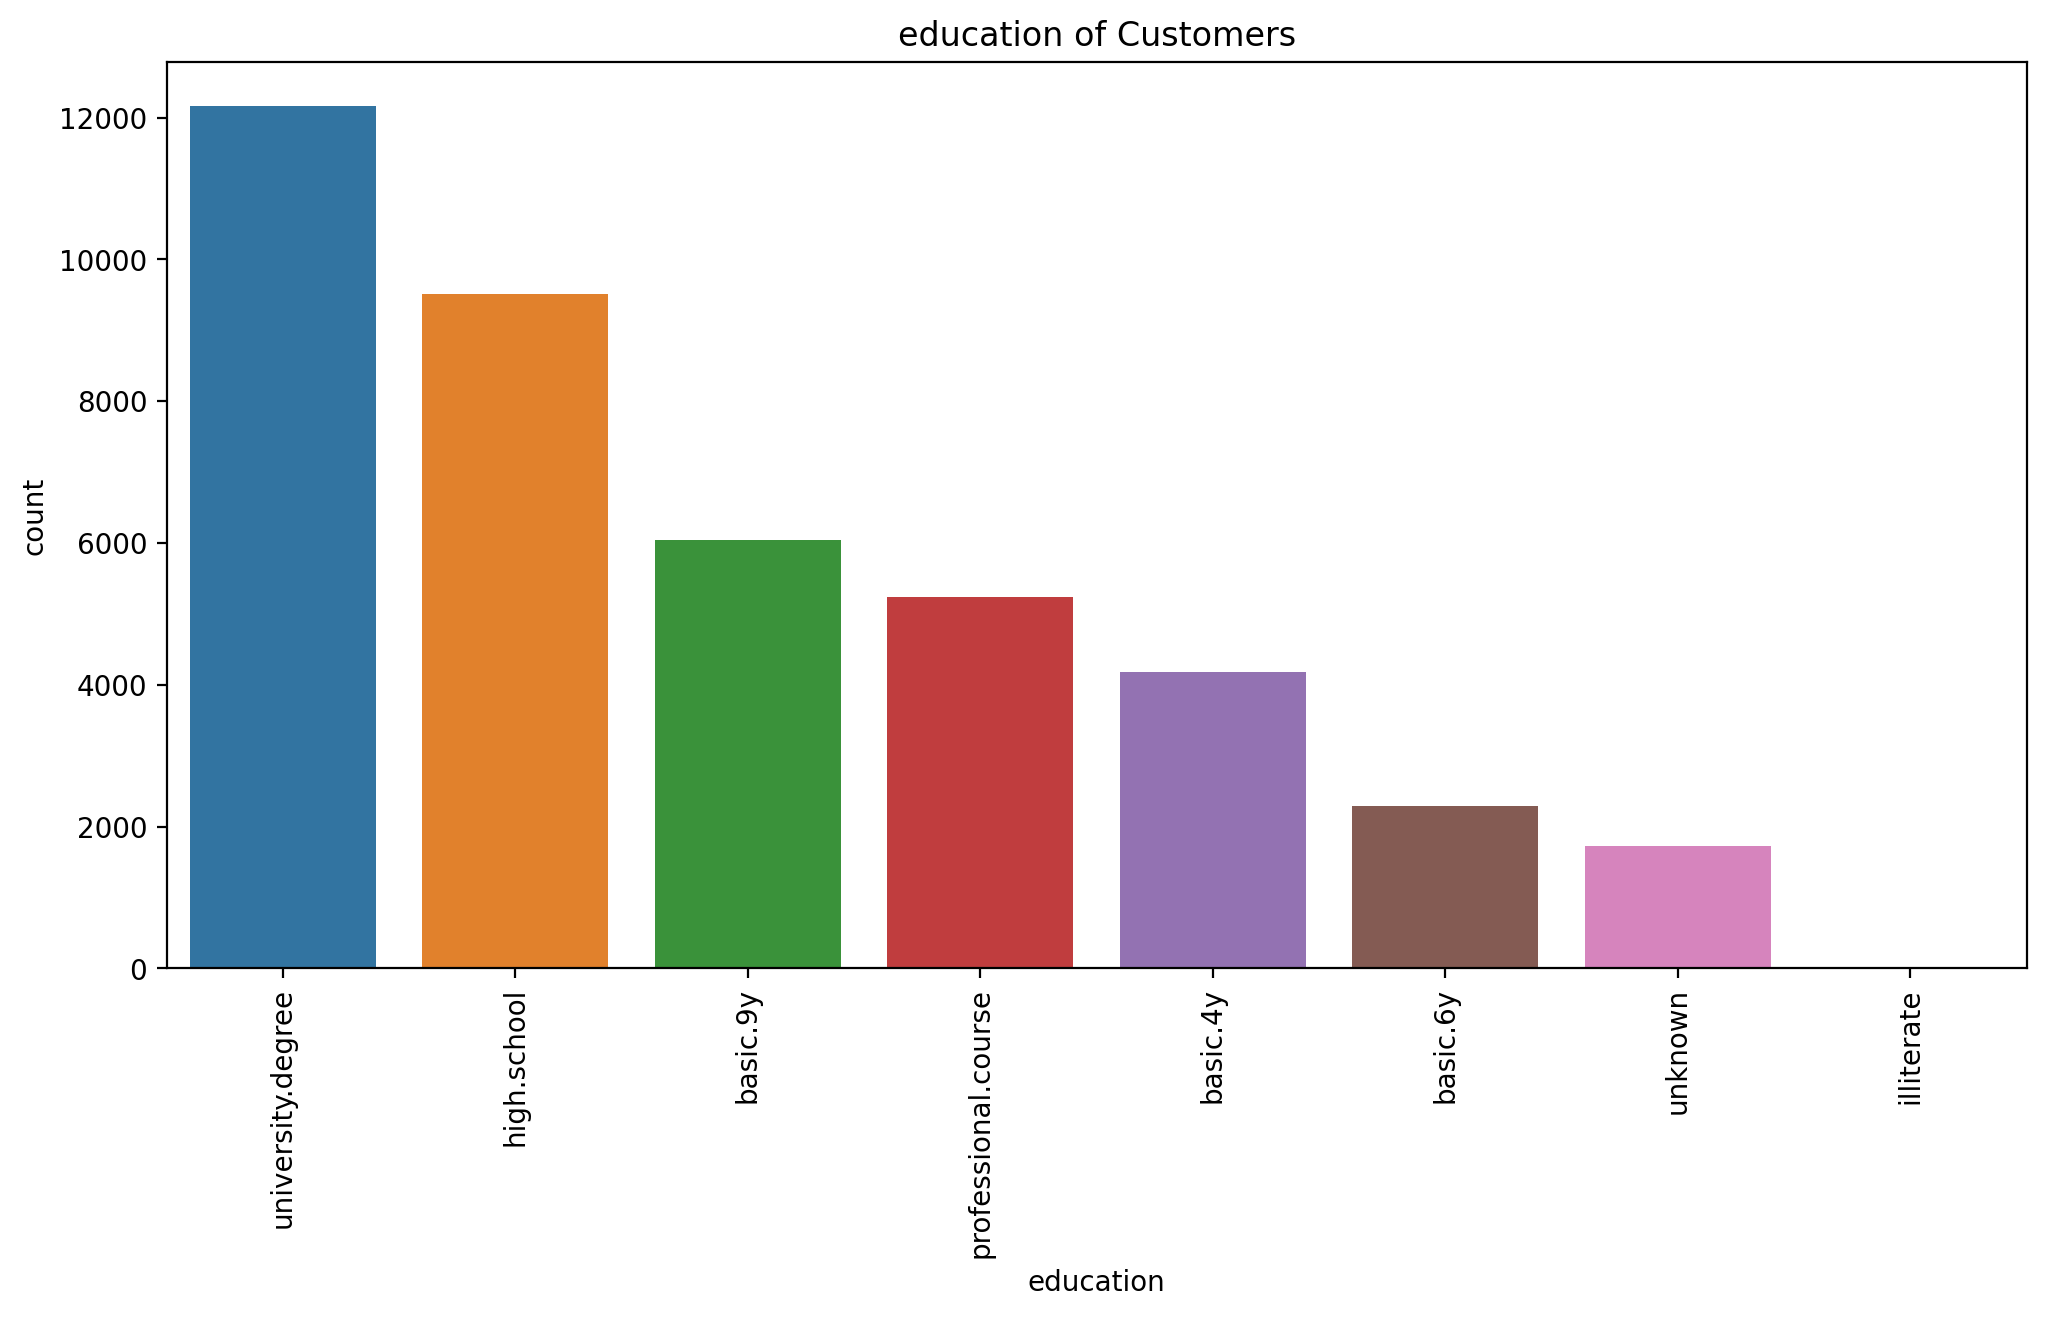

In [19]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=bank,x="education",order=bank.education.value_counts().index)
plt.title("education of Customers") #고객별 교육 상태
plt.xticks(rotation=90)
plt.show()

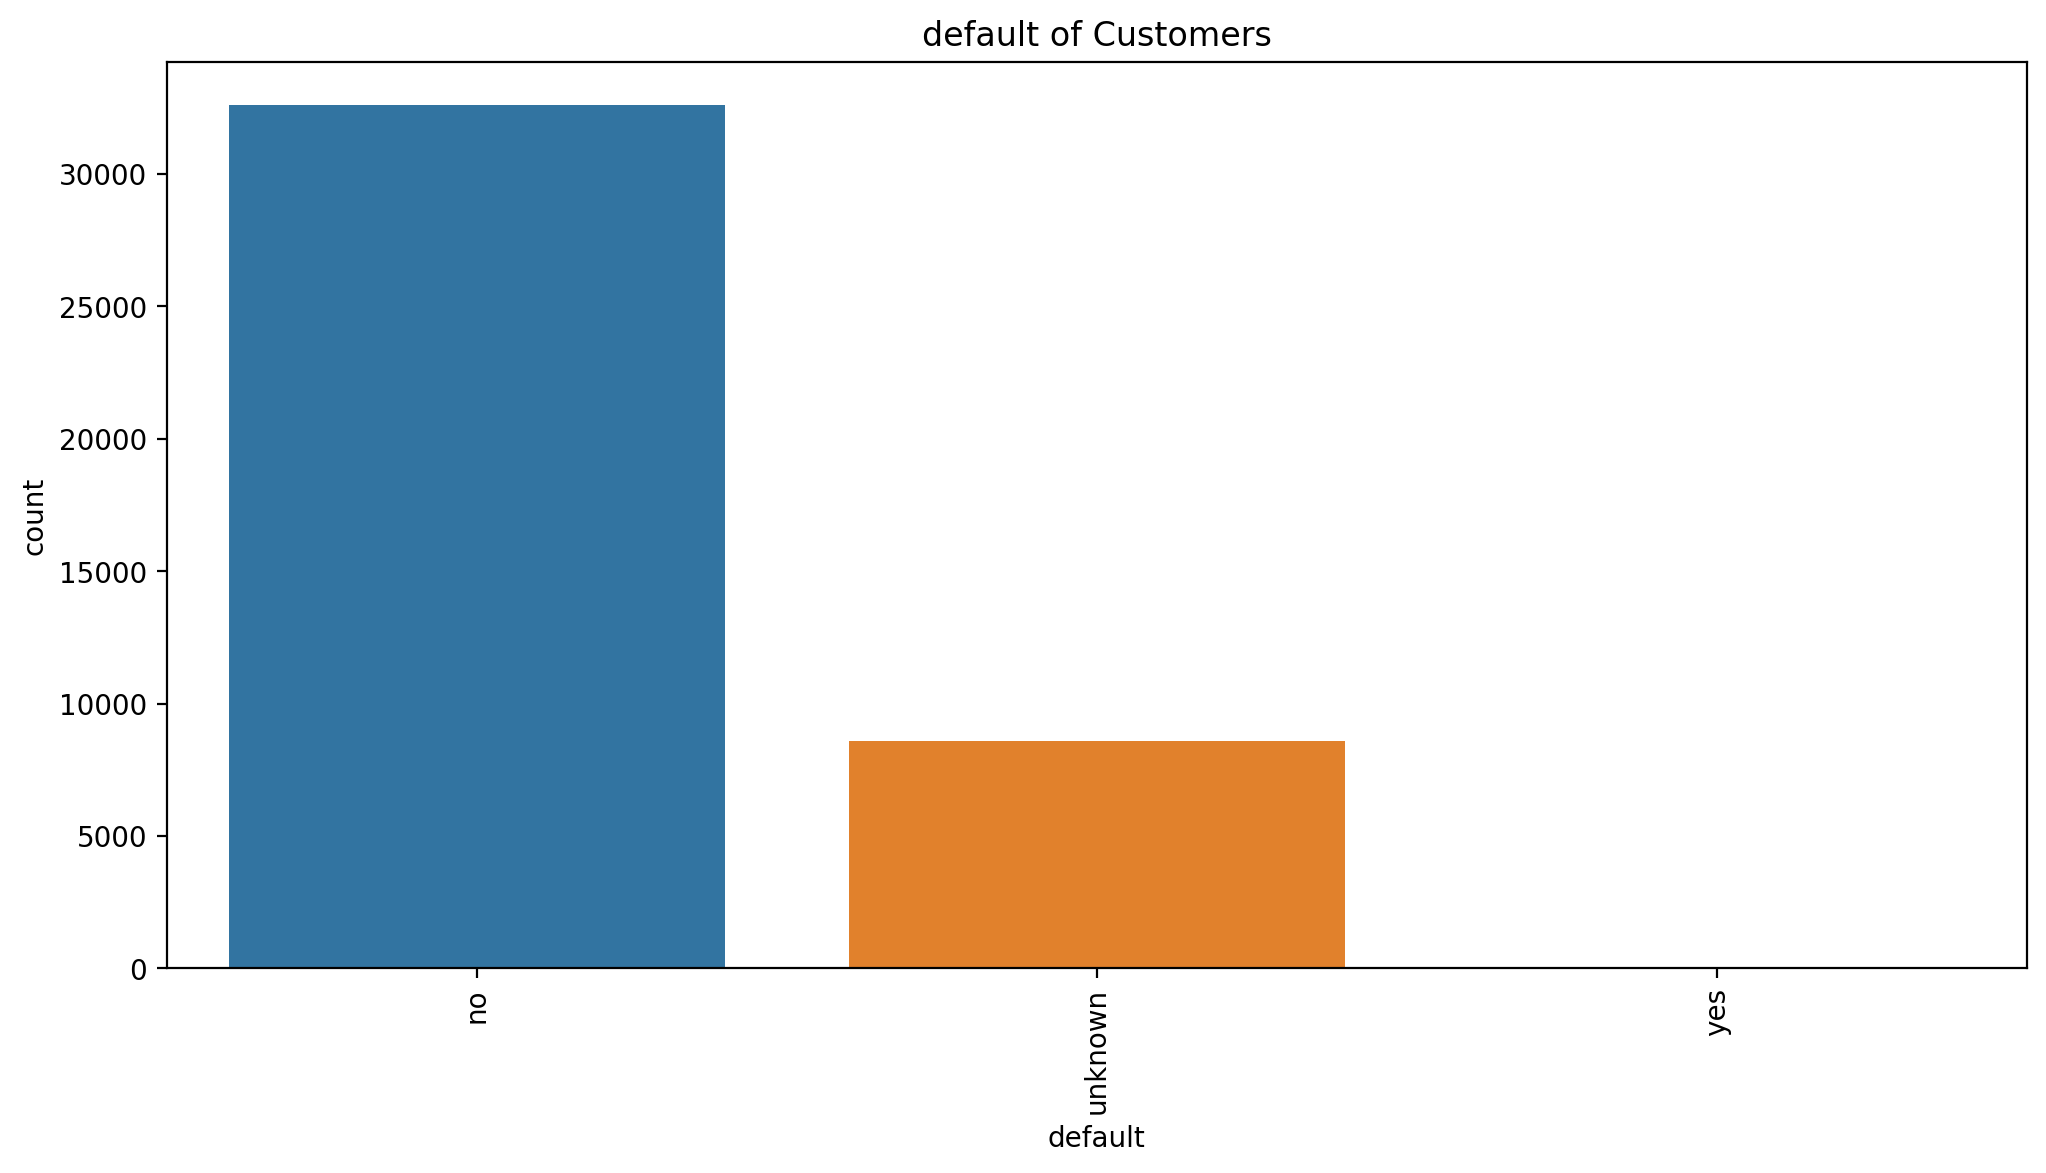

In [20]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=bank,x="default",order=bank.default.value_counts().index)
plt.title("default of Customers") #고객별 신용 불이행
plt.xticks(rotation=90)
plt.show()

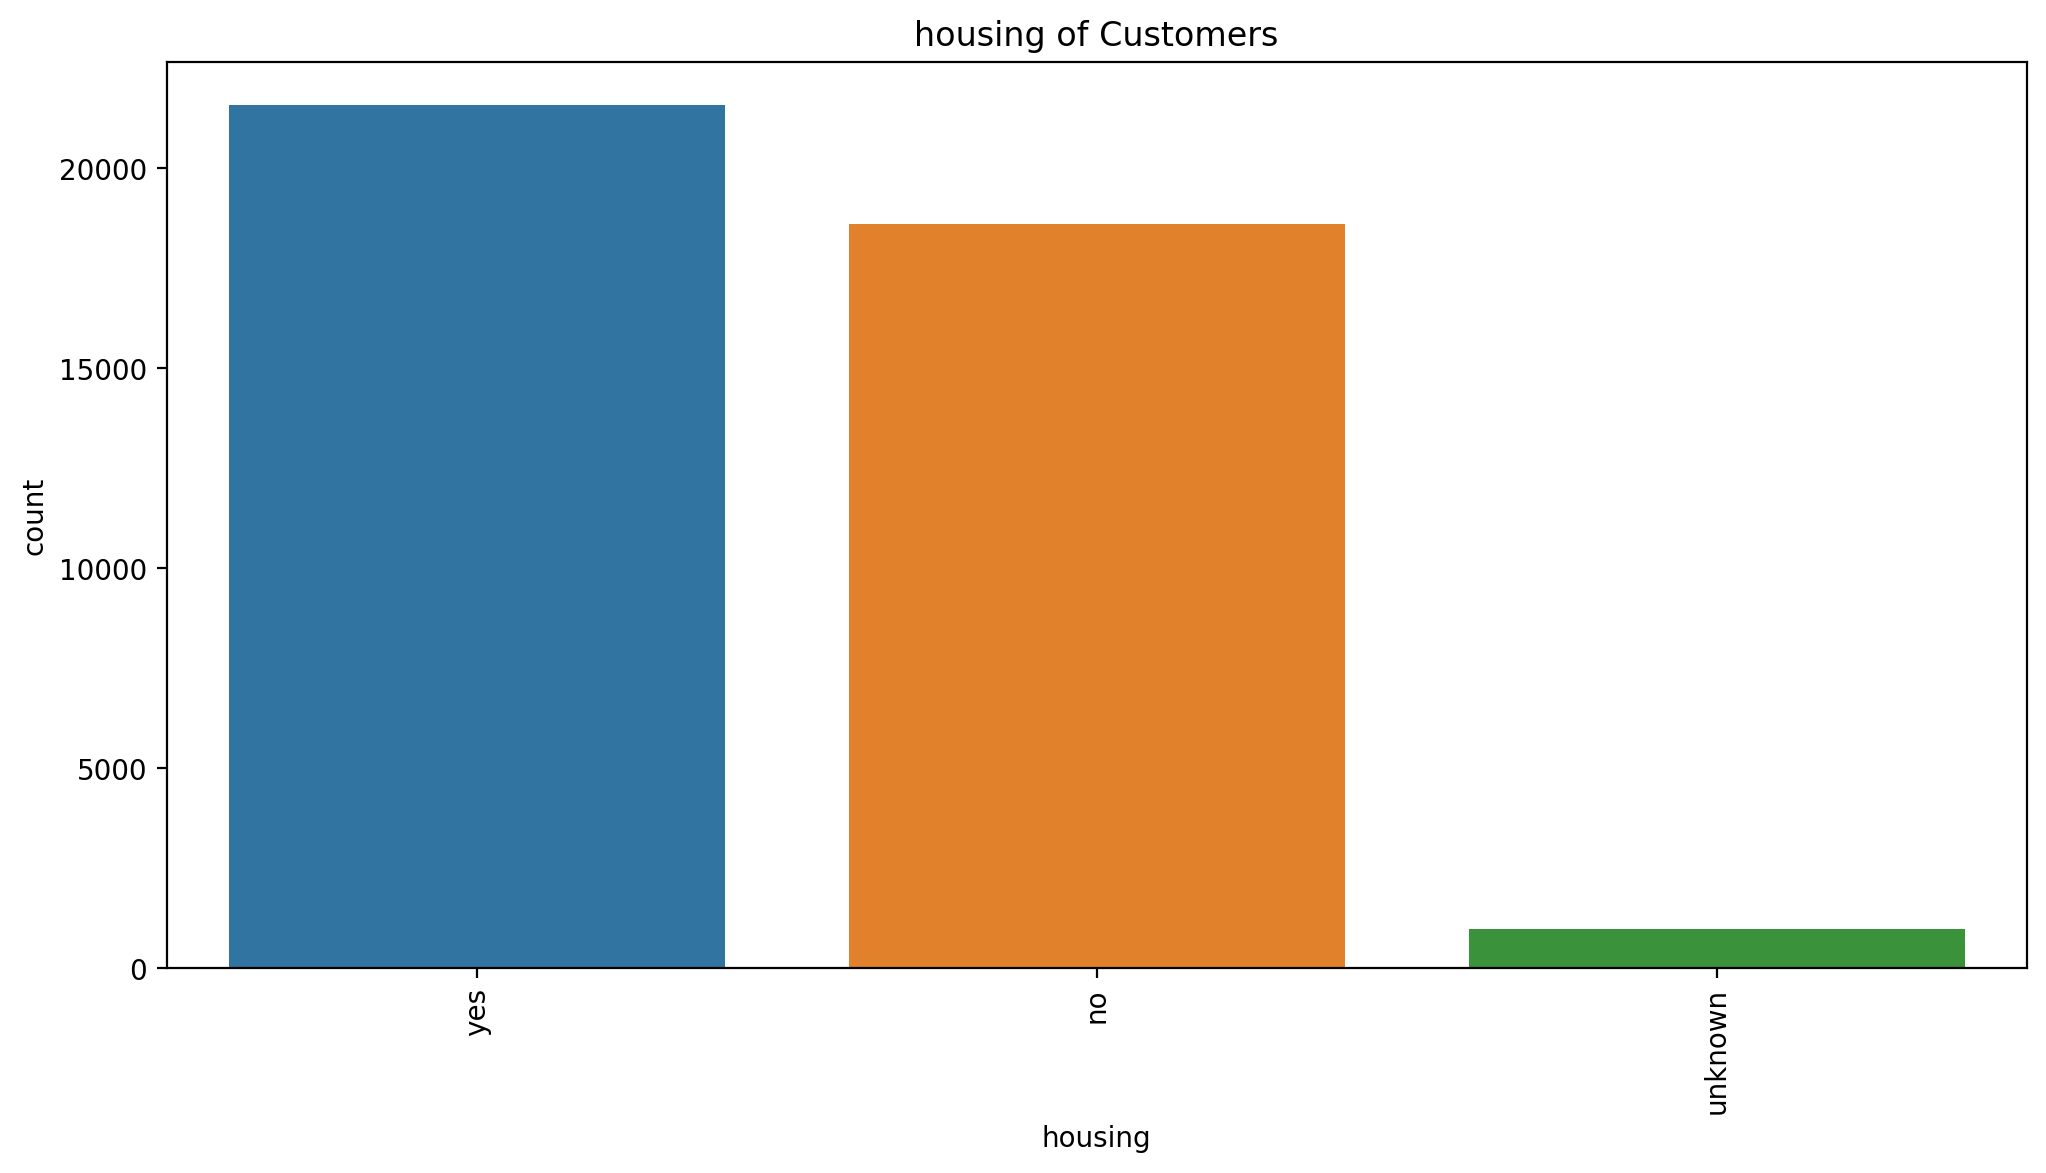

In [21]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=bank,x="housing",order=bank.housing.value_counts().index)
plt.title("housing of Customers") #고객별 주택대출
plt.xticks(rotation=90)
plt.show()

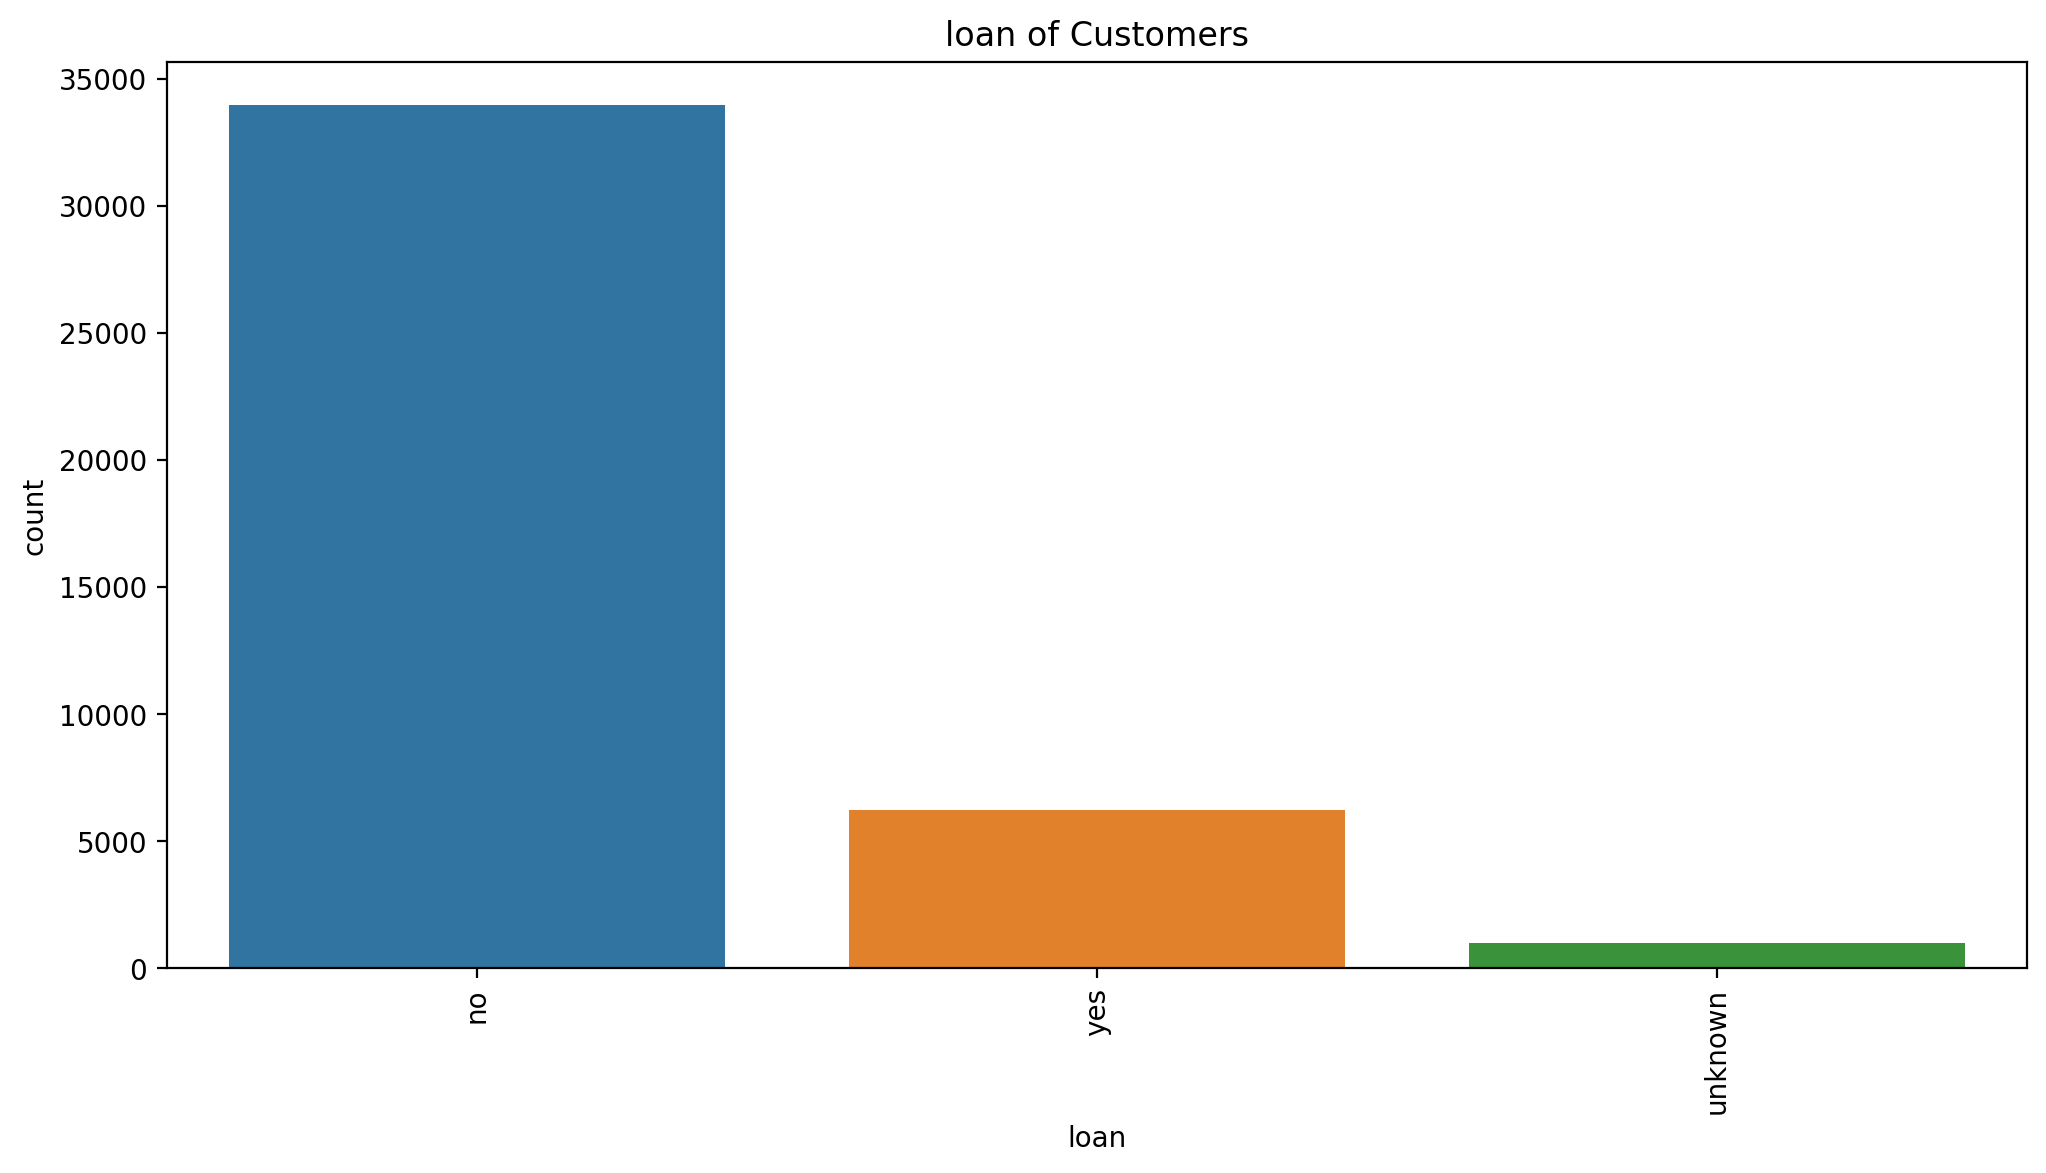

In [22]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=bank,x="loan",order=bank.loan.value_counts().index)
plt.title("loan of Customers") #고객별 개인 대출
plt.xticks(rotation=90)
plt.show()

## 변수별 구독여부를 막대그래프를 통해 알아보자.

결혼상태 변수의 구독여부를 막대그래프로 그리자.

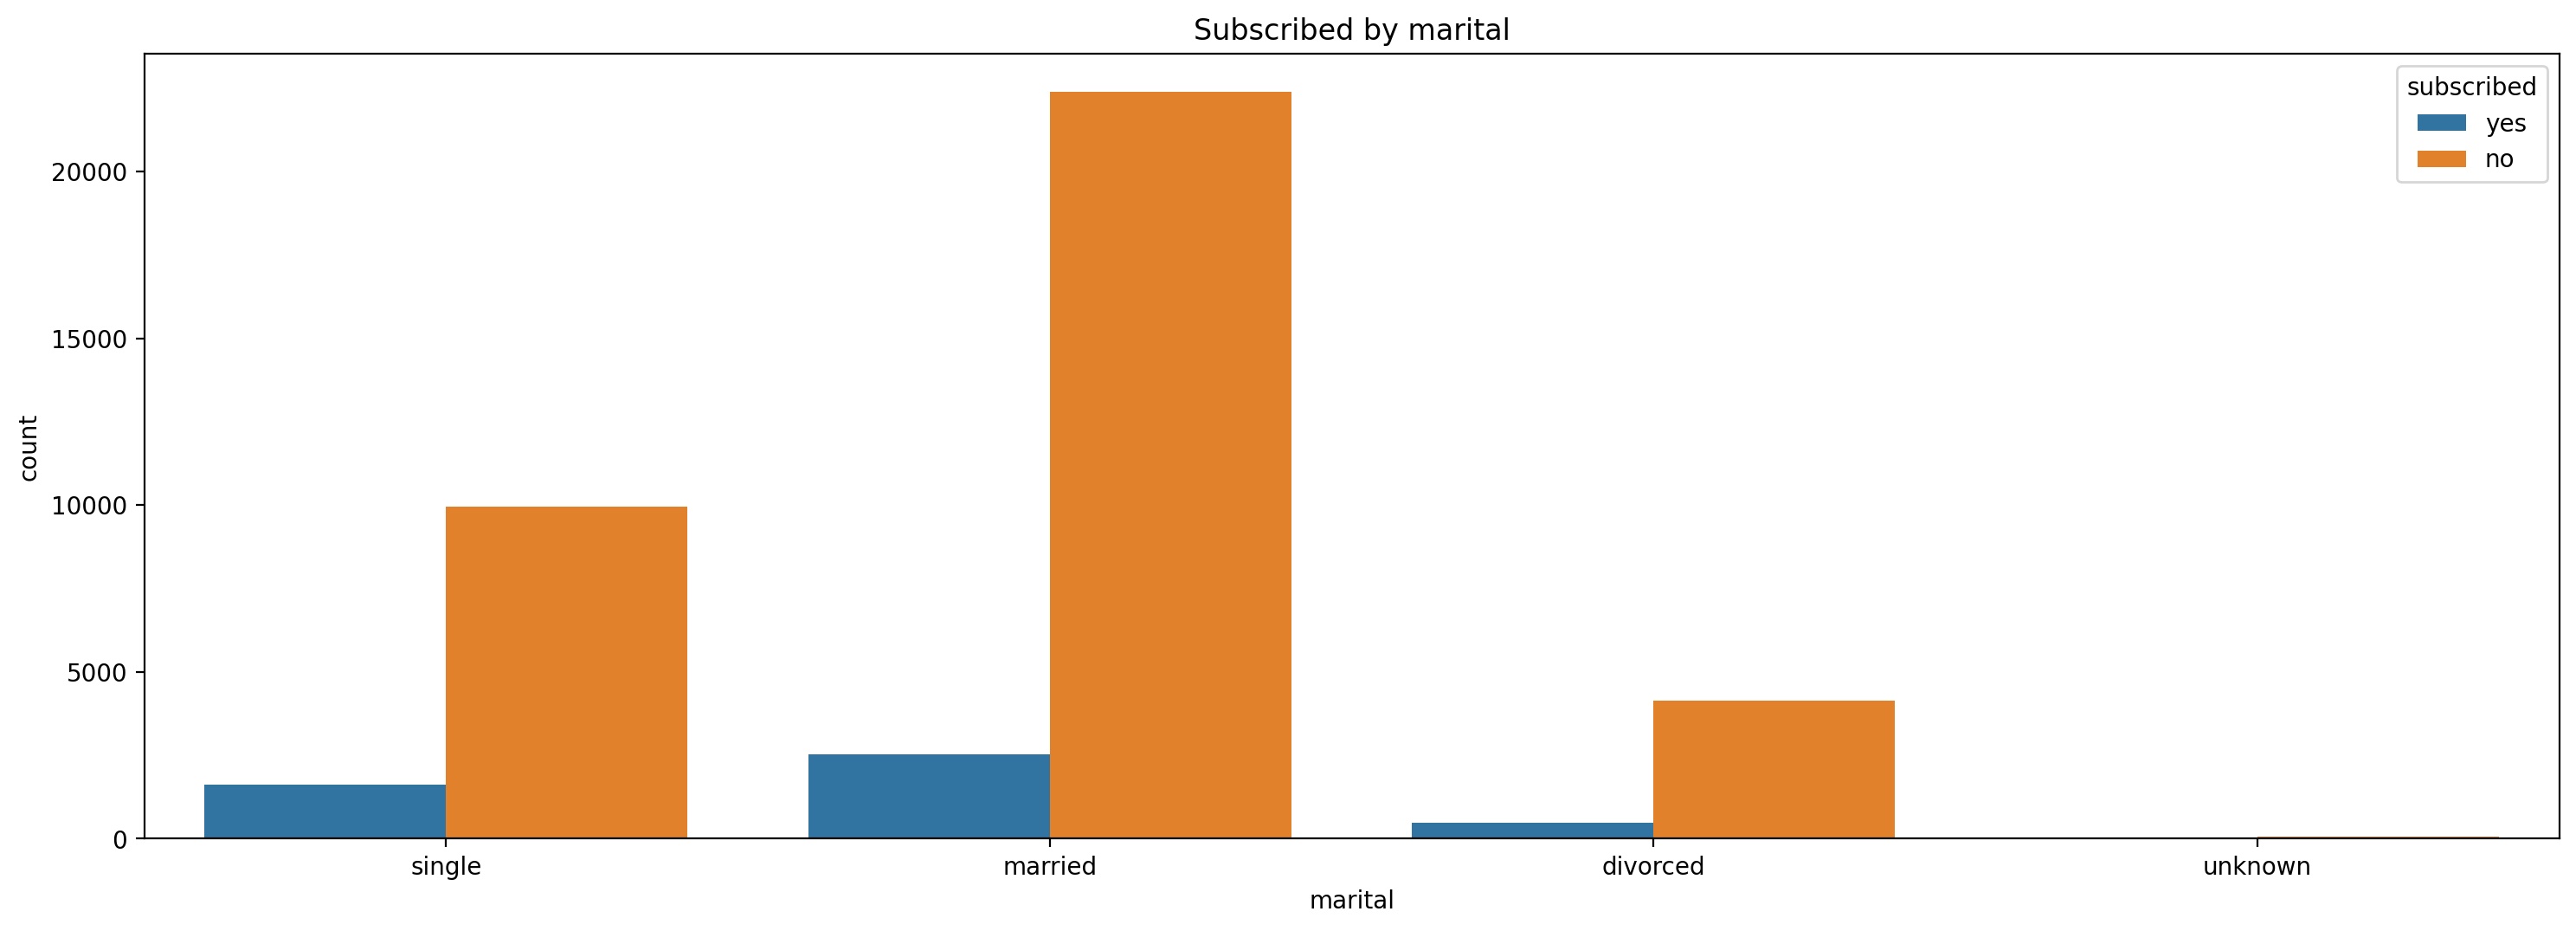

In [23]:
plt.figure(figsize=(18,6),dpi=200)
sns.countplot(data=bank,x="marital", hue='subscribed')
plt.title("Subscribed by marital")
plt.show()

교육 상태 변수의 구독여부를 막대그래프로 그리자.

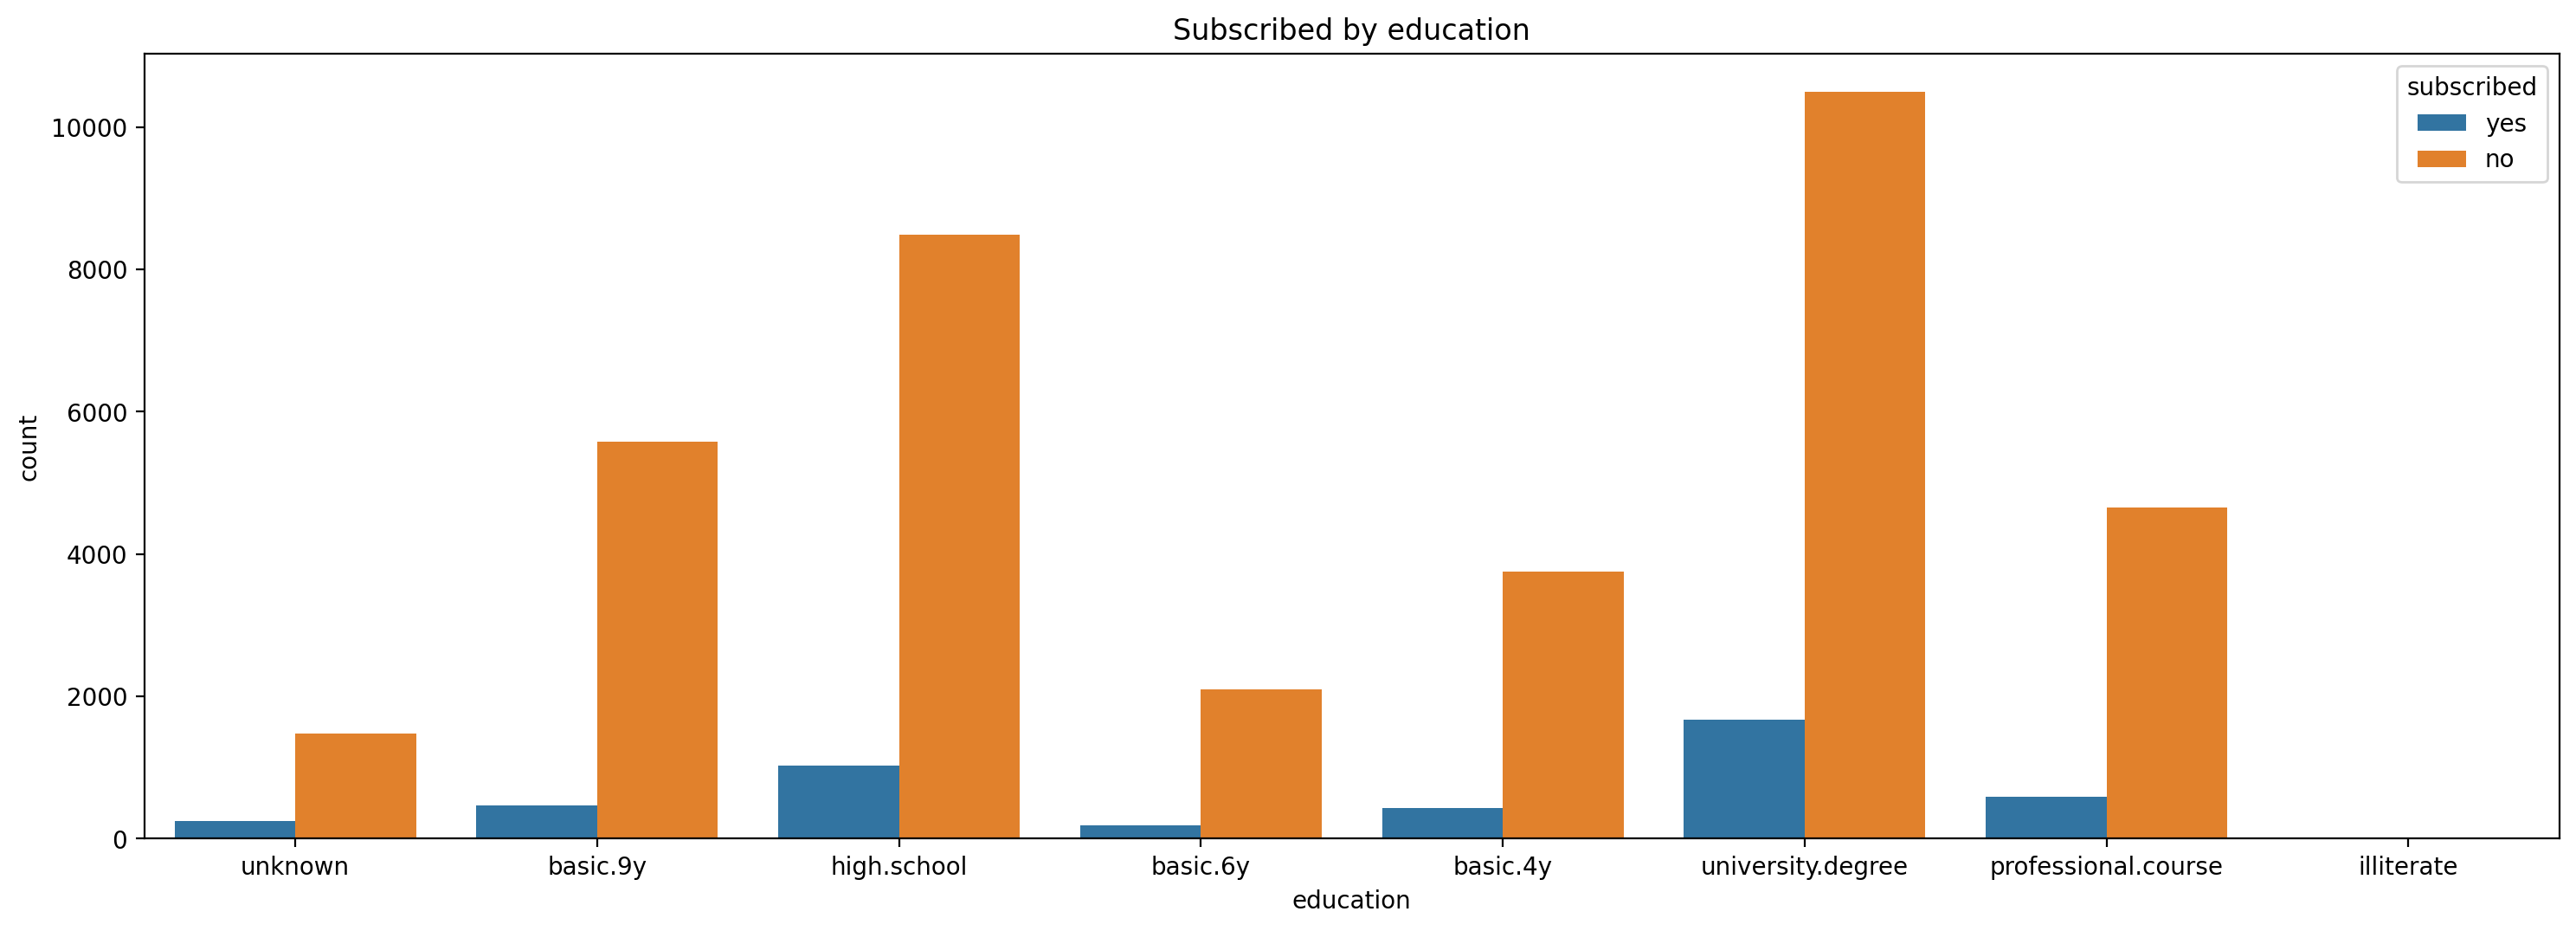

In [24]:
plt.figure(figsize=(18,6),dpi=200)
sns.countplot(data=bank,x="education", hue='subscribed')
plt.title("Subscribed by education")
plt.show()

신용 불이행 변수의 구독여부를 막대그래프로 그리자.

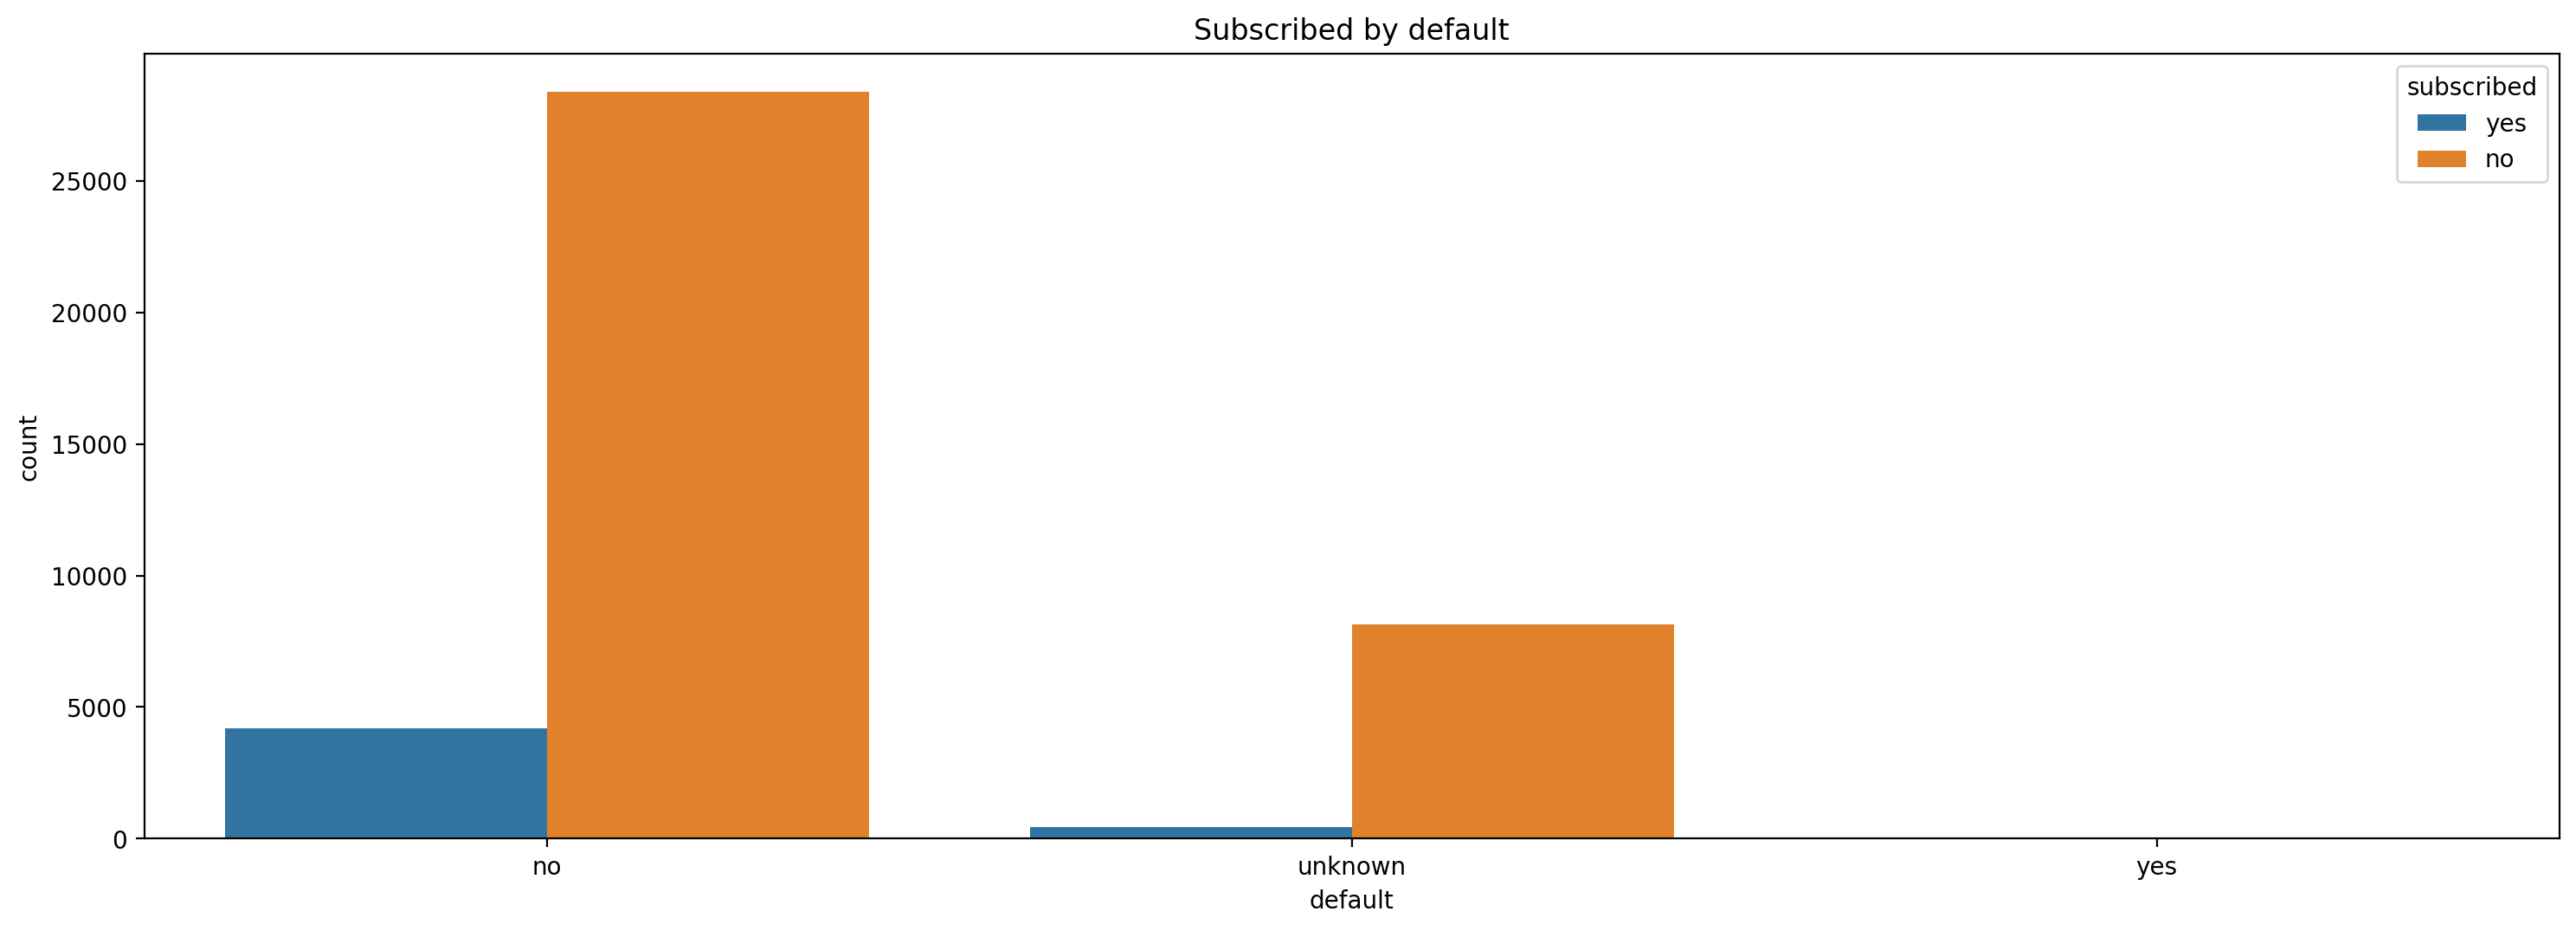

In [25]:
plt.figure(figsize=(18,6),dpi=200)
sns.countplot(data=bank,x="default", hue='subscribed')
plt.title("Subscribed by default")
plt.show()

개인 대출 변수의 구독여부를 막대그래프로 그리자.

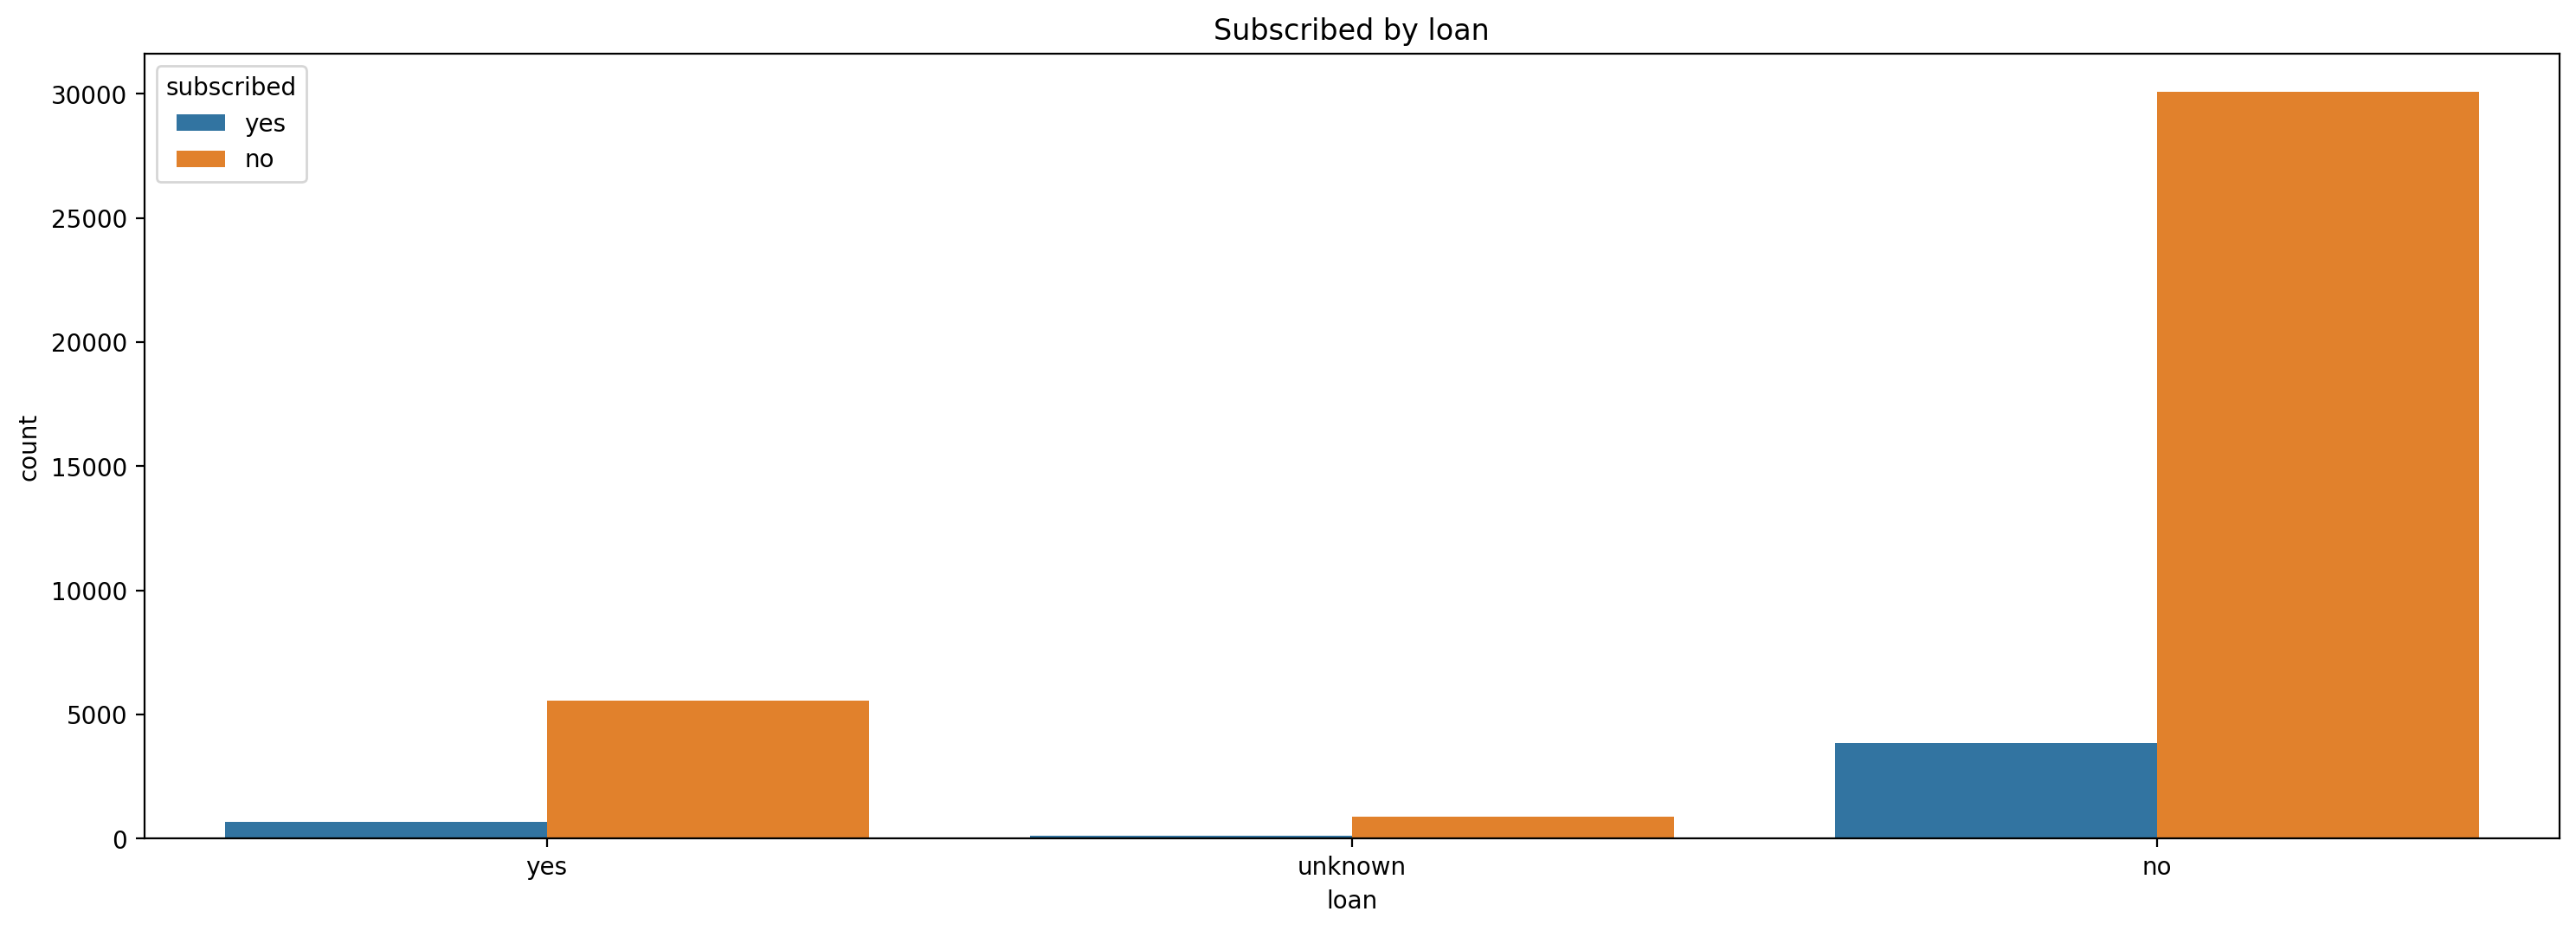

In [26]:
plt.figure(figsize=(18,6),dpi=200)
sns.countplot(data=bank,x="loan", hue='subscribed')
plt.title("Subscribed by loan")
plt.show()

## 구독을 한 사람들 중 가장 높은 비율을 차지하는 직업은 무엇일까?

In [27]:
pd.crosstab(bank['subscribed'], bank['job']).apply(lambda r: r/len(bank), axis=1) #전체 빈도 비율 확인 

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
subscribed,,,,,,,,,,,,
no,0.220210,0.209187,0.032340,0.023162,0.063028,0.031223,0.030883,0.088521,0.014567,0.145989,0.021123,0.007114
yes,0.032825,0.015490,0.003011,0.002574,0.007963,0.010537,0.003618,0.007842,0.006677,0.017724,0.003496,0.000898


- 데이터를 통해 admin직업이 구독을 한 사람들 중 가장 높은 비율을 차지하는 것을 알 수 있다.

## 구독을 한 사람들 중 가장 높은 비율을 차지하는 교육 상태는 무엇일까?

In [28]:
pd.crosstab(bank['subscribed'], bank['education']).apply(lambda r: r/len(bank), axis=1)

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
subscribed,,,,,,,,
no,0.090997,0.051083,0.135282,0.205982,0.000340,0.112848,0.254880,0.035933
yes,0.010391,0.004564,0.011484,0.025032,0.000097,0.014446,0.040546,0.006094


- 데이터를 통해 high.school 교육을 받은 사람이 구독을 한 사람들 중 가장 높은 비율을 차지하는 것을 알 수 있다.

### 구독을 한 사람들 중 가장 높은 비율을 차지하는 나이는 무엇일까?

In [29]:
bank #데이터 확인

,index_old,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,-3.4,92.431,-26.9,0.742,5017.5,yes
1,37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,-2.9,92.201,-31.4,0.869,5076.2,yes
2,37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,-2.9,92.201,-31.4,0.869,5076.2,no
3,37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,-2.9,92.201,-31.4,0.884,5076.2,no
4,37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,-2.9,92.201,-31.4,0.869,5076.2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,40450,92,retired,married,unknown,no,no,yes,cellular,aug,tue,1064,1,-1.7,94.027,-38.3,0.904,4991.6,yes
41184,38921,94,retired,married,basic.9y,no,no,no,cellular,nov,wed,134,1,-3.4,92.649,-30.1,0.716,5017.5,no
41185,27826,95,retired,divorced,basic.6y,no,no,no,cellular,mar,thu,85,1,-1.8,92.843,-50.0,1.650,5099.1,no
41186,38455,98,retired,married,basic.4y,unknown,yes,no,cellular,oct,fri,272,2,-3.4,92.431,-26.9,0.730,5017.5,yes


In [30]:
bank1=bank.query('age>=20 and age<=40') # bank1이라는 이름으로 저장

In [31]:
pd.crosstab(bank1['subscribed'], bank['age']).apply(lambda r: r/len(bank), axis=1)

age,20,21,22,23,24,25,26,27,28,29,...,31,32,33,34,35,36,37,38,39,40
subscribed,,,,,,,,,,,,,,,,,,,,,
no,0.001020,0.001772,0.002452,0.004322,0.009153,0.012261,0.013985,0.017894,0.020637,0.030761,...,0.041930,0.040352,0.039405,0.037899,0.038652,0.039478,0.032485,0.030689,0.032000,0.026148
yes,0.000558,0.000704,0.000874,0.001165,0.002088,0.002258,0.002962,0.002768,0.003666,0.004516,...,0.005341,0.004467,0.005099,0.004467,0.004055,0.003739,0.003326,0.003472,0.002768,0.002039


- 데이터를 한 눈에 파악하기 어렵기 때문에 age를 구간별로 나누어서 보고 싶다.

`-` age을 구간별로 나누자: 어느정도가 적당한 구간일까? 

In [32]:
bank.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

나이를 기준으로 나이가 32이하인 그룹,32이상 38이하인 그룹, 38이상 47이하인 그룹, 47이상인 그룹으로 나누는게 적당해 보인다.

<AxesSubplot:>

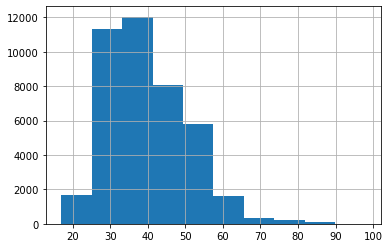

In [33]:
bank.age.hist()

In [34]:
def f(x): 
    if x>=47: y='A4' # 나이가 47이상인 사람들을 A4
    elif x>=38: y='A3'# 나이가 38이상 47미만인 사람들을 A3
    elif x>=32: y='A2'# 나이가 32이상 39미만인 사람들을 A2
    else: y='A1'# 나이가 32미만인 사람들을 A4로 지정하자
    return y 

In [35]:
bank['A']=list(map(f,bank.age)) # A라는 열을 새로 추가하고 나이별로 구간을 설정했다.
bank[['A','age']]

,A,age
0,A1,17
1,A1,17
2,A1,17
3,A1,17
4,A1,17
...,...,...
41183,A4,92
41184,A4,94
41185,A4,95
41186,A4,98


A 라는 열이 잘 추가되었고 구간도 잘 나타내고 있다.

### 다시 한번 구독을 한 사람들 중 가장 높은 비율을 차지하는 나이의 분포를 확인해 보자

In [36]:
pd.crosstab(bank['subscribed'], bank['A']).apply(lambda r: r/len(bank), axis=1)

A,A1,A2,A3,A4
subscribed,,,,
no,0.193891,0.228270,0.236428,0.228756
yes,0.032631,0.025153,0.021390,0.033481


- 데이터를 보니 구독을 한 사람들중 나이가 32미만인 사람들이 가장 많은 비율을 차지하고 있고 나이가 38이상 47미만인 사람들이 가장 적은
    비율을 차지하는 것을 알 수 있다.
    


## 기말평가

### 개인대출이 있으면 포르투갈 은행 캠페인에 많이 가입하는지 알아보자

In [37]:
bank = pd.read_csv('bank_marketing_dataset.csv') #csv파일을 bank라는 이름으로 저장
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
table=pd.crosstab(bank['loan'],bank['subscribed'])

In [40]:
pd.crosstab(bank['loan'],bank['subscribed'],margins=True) # 주변합 포함

subscribed,no,yes,All
loan,,,
no,30100,3850,33950
unknown,883,107,990
yes,5565,683,6248
All,36548,4640,41188


In [41]:
table.apply(lambda x : sum(x), axis = 1) #loan에 대한 주변합

loan
no         33950
unknown      990
yes         6248
dtype: int64

In [42]:
prop = table.apply(lambda x : x/sum(x), axis = 1) # 각 변수의 대한 비율
prop

subscribed,no,yes
loan,,
no,0.886598,0.113402
unknown,0.891919,0.108081
yes,0.890685,0.109315


대출이 없는 사람들 중 구독한 사람의 비율=11.34%

대출이 있는 사람들 중 구독한 사람의 비율=10.93%

표본 데이터에서 계산했기 때문에 조건부 비율 11.34%와 10.93%는 모두 표본비율이다.

In [43]:
prop.iloc[0,1] - prop.iloc[2,1]  # 조건부 비율의 차이

0.0040870810618160724

In [44]:
prop.iloc[0,1] / prop.iloc[2,1] 

1.037388114896379

대출이 없는 사람들 중 구독한 사람의 비율과 대출이 있는 사람들 중 구독한 사람의 비율의 차이는
0.113402-0.10931=0.004087000000000007이다. 

대출이 있는 사람들 중 구독한 사람과 대출이 없는 사람들 중 구독한 사람의 비율이 1.0373배 더 높다.

따라서 대출이 있는 사람들 중 구독한 사람과 대출이 없는 사람의 비율은 차이가 크지 않다고 할 수 있다.

<AxesSubplot:xlabel='loan', ylabel='Count'>

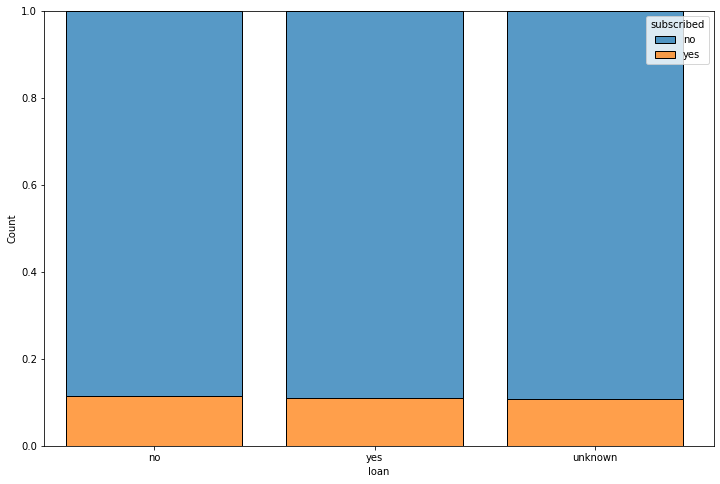

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(x='loan',multiple = 'fill',data=bank,hue='subscribed', shrink = 0.8)

2차원 표와 막대그래프를 보면, 대출의 여부와 구독한 사람의 여부는 연관성이 없다고 보인다.

## duration변수와 age변수 사이의 어떤 관계가 있는지 알아보자

In [46]:
bank1=bank[0:30:]

In [47]:
bank1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


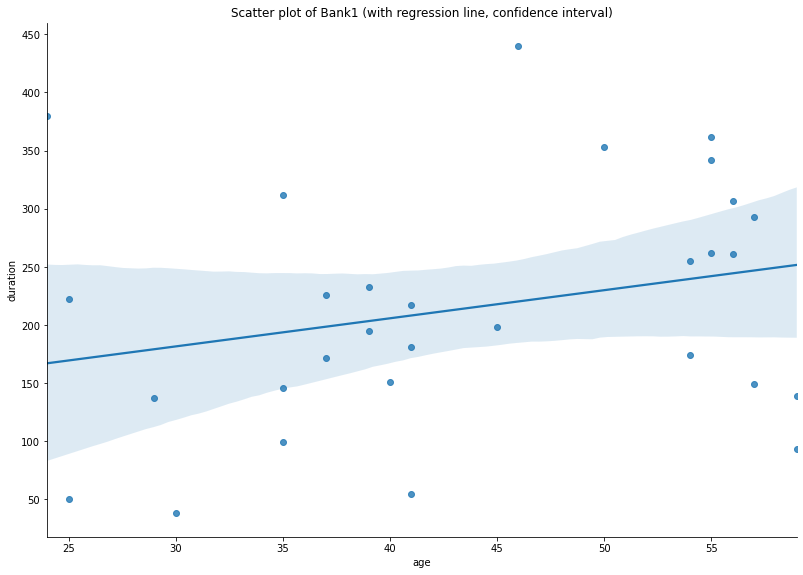

In [48]:
snsplot = sns.lmplot(x='age',y='duration',data=bank1)
snsplot.fig.set_size_inches(12,8)
plt.xlabel('age')
plt.ylabel('duration')
plt.title('Scatter plot of Bank1 (with regression line, confidence interval)')
plt.show()

In [49]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'duration ~ age', data = bank1)
result = model.fit()
result.params   # 추정된 직선의 기울기 및 절편

Intercept    109.144433
age            2.416222
dtype: float64

In [50]:
np.corrcoef(bank1['age'],bank1['duration'])[0,1] #상관 계수

0.2632070454211532

## 상관계수 r=0.26,  추정된 회귀선: duration=109.144+2.416 X age

기울기 2.416는 나이당 예상 duration이 2.416만큼 증가함을 의미한다. 절편은 109.144이다.

관측한 연관은 그저 우연하게 발생한 것이라고 말할 수 있는지에 대해 가설을 설정하여 검증하자.

### 다음과 같은 가설을 검증하려고 한다.

#### 영가설: 모집단에서 age와 duration 사이에 선형관계가 없다.
#### 대안가설: 모집단에서 age와 duration사이에 양의 선형관계가 있다.

In [51]:
obs_slope = result.params[1]  # 기울기
obs_slope

2.416221985058698

In [52]:
# 영가설 하에서 1,000번 반복하여 히스토그램을 만든다. 
# 이 히스토그램이 영가설이 맞다고 가정했을 때 모의실험으로 만든 기울기의 영분포이다.

import random

# random.seed(1118)
bank1_s = bank1.copy()

null_slope = []

for i in range(1000) :
    random.shuffle(bank1_s['duration'])
    res_model = smf.ols(formula = 'duration ~ age', data = bank1_s) 
    res_result = res_model.fit()
    res_slope = res_result.params[1]
    null_slope.append(res_slope)

/home/jcw/anaconda3/lib/python3.8/random.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


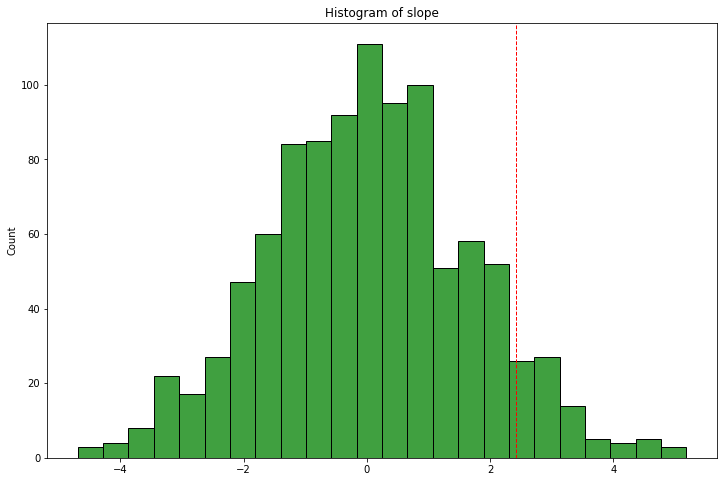

In [53]:
ig = plt.figure(figsize=(12,8))
sns.histplot(null_slope, color="green")
plt.axvline(obs_slope, color='red', linestyle='dashed', linewidth=1)
plt.title('Histogram of slope')
plt.show()

In [54]:
# 유의확률(p-value) , 대안가설에 따라 단측
get_p_value = sum(null_slope>obs_slope) / 1000
get_p_value

0.076

유의수준 5%에서 p-value 값이 약 0.178으로 0.05보다 크기 때문에 영가설을 기각하지 못한다.

첫번째 산점도에서 점들의 패턴이 곡선이 아니고 선형 관계로 볼 수 있고 두 번째 회귀선의 위와 아래의 분포는 유사하게 보인다.

따라서 이론에 기초한 검증을 사용해보자.

ols함수 실행 결과를 summary 함수를 통해 펼쳐보자

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     2.084
Date:                Fri, 17 Dec 2021   Prob (F-statistic):              0.160
Time:                        21:08:01   Log-Likelihood:                -180.04
No. Observations:                  30   AIC:                             364.1
Df Residuals:                      28   BIC:                             366.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.1444     75.436      1.447      0.159     -45.379     263.668
age            2.4162      1.674      1.444      0.160      -1.012       5.845
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.885
Skew:                           0.388   Prob(JB):                        0.642
Kurtosis:                       2.677   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 결과에는 회귀선의 기울기와 절편의 이론적 검증 결과를 정리한 표(2번째)가 있는데, 직선의 기울기 b의 표준화된 통계량의 값은 1.444이고, p-value는 0.160로 통계적으로 매우 유의하다고 할 수 없다.

기울기 2.4162를 기울기의 표준편차 1.674로 나누어 표준화 한 t통계량 값은 1.444이며 p-value 0.160는 대안가설이 양측일 때의 결과이다.

사전에 age와 durationd이 양의 관계라는 심증을 가지고 양측 검증을 한다면 p-value는 0.160을 2로 나눈 0.080가 된다.

## 잔차 도표를 이용한 회귀진단방법

In [56]:
fitted = result.fittedvalues
# fitted = result.predict(th)  # 위와 동일한 결과

In [57]:
residual = result.resid
# residual = th['HeartRate'] - fitted  # 위와 동일한 결과

/home/jcw/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


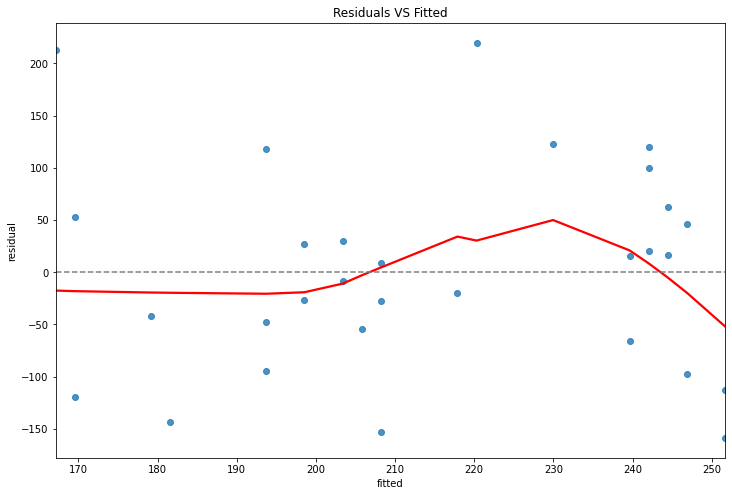

In [58]:
fig = plt.figure(figsize=(12,8))
sns.regplot(fitted, residual, lowess=True, line_kws={'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')
plt.xlabel('fitted')
plt.ylabel('residual')
plt.title('Residuals VS Fitted')
plt.show()

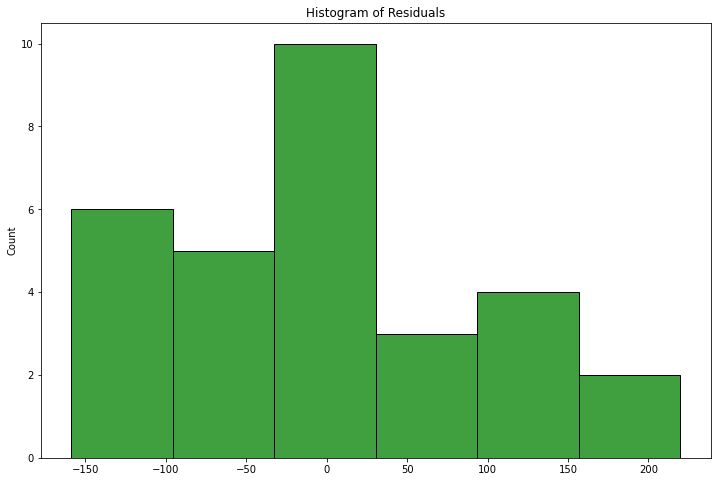

In [59]:
fig = plt.figure(figsize=(12,8))
sns.histplot(residual, color="green")
plt.title('Histogram of Residuals')
plt.show()

잔차가 0을 중심으로 위아래로 랜덤하게 흩어져 있다.

예측값과 잔차사이에도 눈에 띄는 경향이 없다.

하지만 잔차의 히스토그램이 0을 중심으로 종모양으로 분포되어있다고 할 수 없다.

따라서 설명된 모형 가정이 타당하다고 볼 수 없다.

## 구독을 한 사람들 중 나이와 주택대출의 관계를 알아보자

설명변수는 범주형 변수이고 반응변수는 양적변수이다.

구독을 한 사람들을 bank2이라는 이름으로 저장하였다.

In [60]:
bank2=bank[bank['subscribed']=='yes']

In [61]:
bank2=bank2[['age','housing']]

In [62]:
bank2=bank2.head(200)

이 연구의 가설은 다음과 같이 기술할 수 있다.

영가설: 구독을 한 사람들 중 나이와 주택대출은 서로 연관성이 없다.


 H
0
:
μ
y
e
s
−
μ
n
o
=
0

대안가설: 구독을 한 사람들 중 나이와 주택대출은 서로 연광성이 있다.

H
a
:
μ
y
e
s
−
μ
n
o
≠
0


연구자가 관심을 가지는 모수는 두 그룹의 모평균 차이이다.

In [63]:
bank2.groupby(bank2.housing).describe()

age                                                   
         count       mean       std   min   25%   50%   75%   max
housing                                                          
no       102.0  39.627451  9.608084  22.0  32.0  38.0  47.0  60.0
unknown    2.0  29.000000  2.828427  27.0  28.0  29.0  30.0  31.0
yes       96.0  41.937500  8.331061  24.0  37.0  42.0  46.0  60.0

<Figure size 7200x576 with 0 Axes>

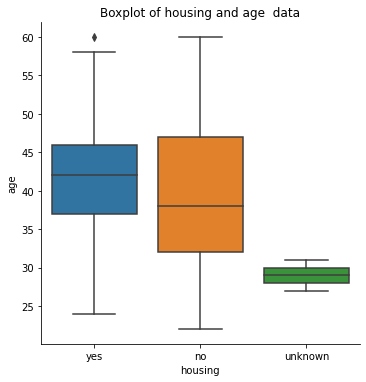

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(100,8))
sns.catplot(x="housing",y="age",data=bank2,kind="box")
plt.title("Boxplot of housing and age  data")
plt.show()

In [65]:
res_mean = bank2.groupby(bank2.housing).mean()
obs_diff = res_mean.iloc[0,0] - res_mean.iloc[1,0]
obs_diff

10.627450980392155

주택대출의 따른 평균 나이의 차이를 3S 전략으로 판단해보자.

Statistic: 주택대출의 따른 나이의 표본평균 차이 (
¯x
y
e
s
−
¯
x
n
o    
)가 추정량이고 표본에서 추정량의 관측값이 10.6살이다.

In [66]:
# np.random.seed(1118)

rep=1000     # Bootstrap 반복수 설정
n=len(bank2)  # 추출할 표본의 크기

ind = range(n)
bs_replicates = []

for i in range(rep):
    # 주어진 자료로부터  임의 복원 추출한 표본(주어진 데이터와 크기 동일)의 index 번호
    randomRows = np.random.choice(ind, size=len(bank2))    
    bank2_sample = bank2.iloc[randomRows, :]                # 추출된 표본
    res_mean = bank2_sample.groupby(bank2_sample.housing).mean() # 각 그룹별 평균계산
    res_diff = res_mean.iloc[0,0] - res_mean.iloc[1,0]   # 추출된 표본에서의 평균차이
    bs_replicates.append(res_diff) 

In [67]:
np.percentile(bs_replicates,[2.5,97.5])

array([-3.3554964, 13.7864418])

95% 붓스트랩 신뢰구간을 구했더니 -3.3990,13.7692를 얻었다.

위에서 그려본 상자그림을 통하여 두 그룹의 분포가 대칭임을 추측할 수 있겠지만, 그룹별로 age변수 값의 히스토그램(커널밀도곡선 포함)을 그려 확인해 보자.

In [70]:
x_B = bank2[bank2['housing'] =='yes']['age']
x_NB = bank2[bank2['housing'] =='no']['age']

<Figure size 864x576 with 0 Axes>

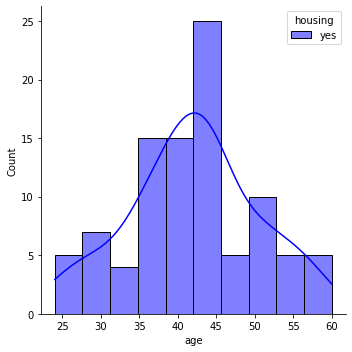

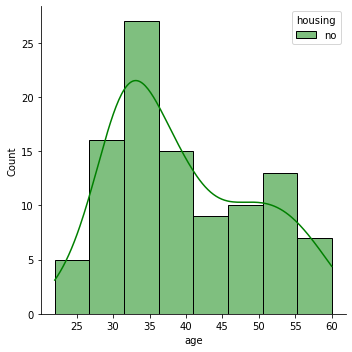

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.displot(x_B, color="blue", kde = True, label="yes")
plt.legend(title="housing")
sns.displot(x_NB, color="green", kde = True, label="no")
plt.legend(title="housing")
plt.show()

양쪽 그룹 age의 히스토그램이 거의 종모양이고 정규분포 곡선과 유사해 보이므로 t 검정을 실행할 것이다.

양쪽 그룹 age의 히스토그램이 거의 종모양이고 정규분포 곡선과 유사해 보이므로 t 검정을 실행할 것이다.

In [73]:
import scipy.stats as stats
print(stats.bartlett(x_B, x_NB))
print(stats.levene(x_B, x_NB))

BartlettResult(statistic=1.9688282019103682, pvalue=0.16057229666594)
LeveneResult(statistic=3.618607196194462, pvalue=0.058602940133835844)


분산의 동일성 검정에서 p-value가 각각 0.1605, 0.0586으로 전체적으로 판단했을 때 두 그룹의 분산이 동일하지 않다고 주장할 충분한 근거가 없어 보이므로, 등분산 가정 하에서 t검정을 실시한다.

In [74]:
t_stat, pvalue = stats.ttest_ind(x_B, x_NB, equal_var=True) 

In [75]:
print(t_stat, pvalue)

1.8026663177000628 0.07297683578691767


이론에 기초하여 t분포를 이용한 p-value는 0.0729으로 모의실험으로 구한 p-value 0.088과 거의 비슷하다.

모의실험이나 이론에 기초한 방법으로 구한 p-value 모두 영가설을 반대하는 강한 증거를 제공하지 못한다. 즉, 연관이 있다고 말할 수 있다. 